<a href="https://colab.research.google.com/github/EbukaObi/Predicting-Football-Match-Results-using-Classification-algorithms/blob/main/KaggleX_Mentorship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
np.random.seed(42)

In [2]:
df1=pd.read_csv('results.csv',encoding='iso-8859-1' )

# Data Preprocessing

In [3]:
df1

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [4]:
#Check for null/missing values in columns and rows
df1.isna().sum()

Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64

In [5]:
#drop Nan rows.
df1.dropna(inplace=True)
df1.reset_index(inplace=True)

In [6]:
#Inspect data
df1

,index,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
8285,11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
8286,11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
8287,11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [7]:
#Creating the Encoding Function

def Create_Expanded_dataset(dataframe, columns):
    for col in columns:
        encoder=OneHotEncoder()
        encarray=encoder.fit_transform(dataframe[[col]]).toarray()
        col_array=encoder.categories_
        col_labels=np.array(col_array).flatten()
        if col=='AwayTeam' or 'HomeTeam':
          new_col_labels=[]
          for i in col_labels:
            i=i+'_'+col
            new_col_labels.append(i)
          onehotvec=pd.DataFrame(encarray, columns=new_col_labels)
          dataframe= pd.concat([dataframe, onehotvec], axis=1)
        else:
          onehotvec=pd.DataFrame(encarray, columns=col_labels)
          dataframe= pd.concat([dataframe, onehotvec], axis=1)
    return dataframe

In [8]:
#Encoding the AwayTeam and HomeTeam columns
features=['AwayTeam','HomeTeam']
new_data=Create_Expanded_dataset(df1, features)
new_data.head()

,index,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Southampton_HomeTeam,Stoke_HomeTeam,Sunderland_HomeTeam,Swansea_HomeTeam,Tottenham_HomeTeam,Watford_HomeTeam,West Brom_HomeTeam,West Ham_HomeTeam,Wigan_HomeTeam,Wolves_HomeTeam
0,2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Divide Fulltime variable by 2 to assume halftime variable, then drop the fulltime variable.
def createhalftime(data, variables):
  for i in variables:
    data['half'+i]=data[i]/2
    data.drop(columns=[i],inplace=True)


In [10]:
columns=['HS','HST','HF','HY','HR','HC','AS','AST','AF','AY','AR','AC']
createhalftime(new_data,columns)

In [11]:
#Drop the unnecesary columns
new_data.drop(columns=['index','Season','DateTime','HomeTeam', 'AwayTeam','Referee','FTHG','FTAG'], inplace=True)

In [12]:
new_data

,FTR,HTHG,HTAG,HTR,Arsenal_AwayTeam,Aston Villa_AwayTeam,Birmingham_AwayTeam,Blackburn_AwayTeam,Blackpool_AwayTeam,Bolton_AwayTeam,...,halfHF,halfHY,halfHR,halfHC,halfAS,halfAST,halfAF,halfAY,halfAR,halfAC
0,H,2.0,0.0,H,0.0,0.0,0.0,0.0,0.0,0.0,...,6.5,0.5,0.0,3.0,4.0,2.0,6.0,1.0,0.0,3.0
1,H,1.0,0.0,H,0.0,0.0,0.0,0.0,0.0,0.0,...,9.5,0.5,0.0,3.5,6.0,2.5,7.0,1.0,0.0,3.5
2,A,1.0,1.0,D,0.0,0.0,0.0,0.0,0.0,0.0,...,7.5,2.5,0.5,4.0,8.0,4.5,10.5,1.5,0.0,2.0
3,D,1.0,2.0,A,0.0,0.0,0.0,0.0,0.0,0.0,...,5.5,0.5,0.0,2.5,6.5,3.0,6.5,0.5,0.0,4.0
4,H,2.0,0.0,H,0.0,0.0,0.0,0.0,0.0,0.0,...,10.5,0.5,0.0,3.0,6.0,3.0,10.0,1.5,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,A,0.0,1.0,A,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,0.0,4.5,5.5,2.5,7.0,1.5,0.0,1.5
8285,H,0.0,0.0,D,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.5,0.5,3.0,0.5,0.0,3.0
8286,H,2.0,0.0,H,0.0,0.0,0.0,0.0,0.0,0.0,...,5.5,0.5,0.0,1.5,5.5,1.5,6.0,0.5,0.0,2.0
8287,H,1.0,0.0,H,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.5,0.0,3.0,9.0,2.0,5.0,0.5,0.0,3.5


In [13]:
# def Create_Result(dataframe, columns):
#     for col in columns:
#         encoder=OneHotEncoder()
#         encarray=encoder.fit_transform(dataframe[[col]]).toarray()
#         col_array=encoder.categories_
#         col_labels=np.array(col_array).flatten()
#         onehotvec=pd.DataFrame(encarray, columns=col_labels)
#         dataframe=pd.concat([dataframe, onehotvec], axis=1)
#     return dataframe

In [14]:
# res_column=['FTR']
# new_data=Create_Result(new_data,res_column)

In [15]:
res_column2=['HTR']
new_data=Create_Expanded_dataset(new_data,res_column2)

In [16]:
new_data.drop(columns=['HTR',], inplace=True)

In [17]:
new_data

,FTR,HTHG,HTAG,Arsenal_AwayTeam,Aston Villa_AwayTeam,Birmingham_AwayTeam,Blackburn_AwayTeam,Blackpool_AwayTeam,Bolton_AwayTeam,Bournemouth_AwayTeam,...,halfHC,halfAS,halfAST,halfAF,halfAY,halfAR,halfAC,A_HTR,D_HTR,H_HTR
0,H,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,2.0,6.0,1.0,0.0,3.0,0.0,0.0,1.0
1,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,6.0,2.5,7.0,1.0,0.0,3.5,0.0,0.0,1.0
2,A,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,8.0,4.5,10.5,1.5,0.0,2.0,0.0,1.0,0.0
3,D,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,6.5,3.0,6.5,0.5,0.0,4.0,1.0,0.0,0.0
4,H,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,3.0,10.0,1.5,0.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,A,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,5.5,2.5,7.0,1.5,0.0,1.5,1.0,0.0,0.0
8285,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.5,0.5,3.0,0.5,0.0,3.0,0.0,1.0,0.0
8286,H,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,5.5,1.5,6.0,0.5,0.0,2.0,0.0,0.0,1.0
8287,H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,9.0,2.0,5.0,0.5,0.0,3.5,0.0,0.0,1.0


In [18]:
label_encoder = preprocessing.LabelEncoder()
y= label_encoder.fit_transform(new_data['FTR'])
X=new_data.drop(columns=['FTR'])


In [19]:
y

array([2, 2, 0, ..., 2, 2, 1])

In [20]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train, y_test=train_test_split(X_scaled, y)


In [21]:
X_train

array([[ 0.38296163, -0.70042801, -0.22899298, ..., -0.55779541,
        -0.83809484,  1.36246321],
       [ 0.38296163,  0.68158765, -0.22899298, ..., -0.55779541,
         1.19318239, -0.73396477],
       [-0.81945086, -0.70042801, -0.22899298, ..., -0.55779541,
         1.19318239, -0.73396477],
       ...,
       [ 0.38296163,  0.68158765, -0.22899298, ..., -0.55779541,
         1.19318239, -0.73396477],
       [-0.81945086,  0.68158765, -0.22899298, ...,  1.79277202,
        -0.83809484, -0.73396477],
       [-0.81945086,  2.06360332, -0.22899298, ...,  1.79277202,
        -0.83809484, -0.73396477]])

#Model Building
1. K-Nearest Neighbors

In [22]:
#Iterating over a number of k-clusters(3-50) to determine which number of cluster gives the best accuracy for the classification task.
accuracy=[]
n_neighbors=[]
for i in range(3,100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  acc=knn.score(X_test,y_test)
  accuracy.append(acc)
  n_neighbors.append(i)

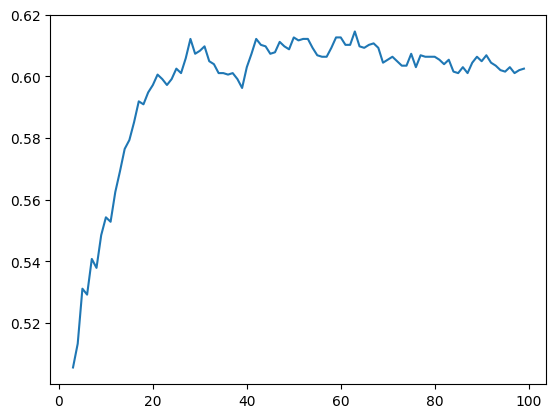

In [23]:
plt.plot(n_neighbors,accuracy)

In [24]:
np.argmax(accuracy)

60

In [26]:
n_neighbors[60]

63

In [27]:
accuracy[60]

0.6145682585624699

In [ ]:
#This means using a KNN model, 50 clusters gives the highest accuracy of 61.31%

2. Logistic Regression

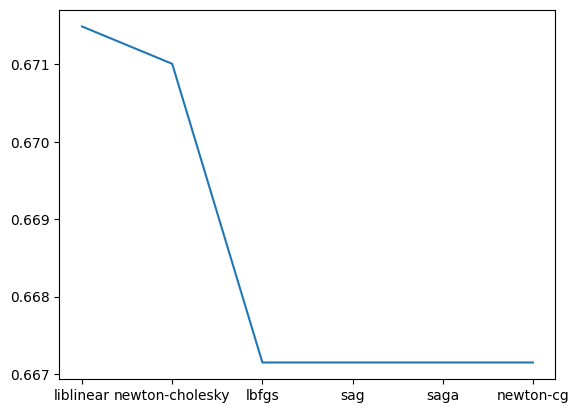

In [31]:
#CHecking which of the solvers produces the best accuracy for this task
solvers=['liblinear','newton-cholesky','lbfgs','sag','saga','newton-cg']
logreg_accuracy=[]
for j in solvers:
  log_reg = LogisticRegression(solver=j)
  log_reg.fit(X_train, y_train)
  log_acc=log_reg.score(X_test, y_test)
  logreg_accuracy.append(log_acc)

plt.plot(solvers,logreg_accuracy)

In [32]:
logreg_accuracy

[0.6714905933429812,
 0.6710082006753497,
 0.6671490593342981,
 0.6671490593342981,
 0.6671490593342981,
 0.6671490593342981]

3. Support Vector

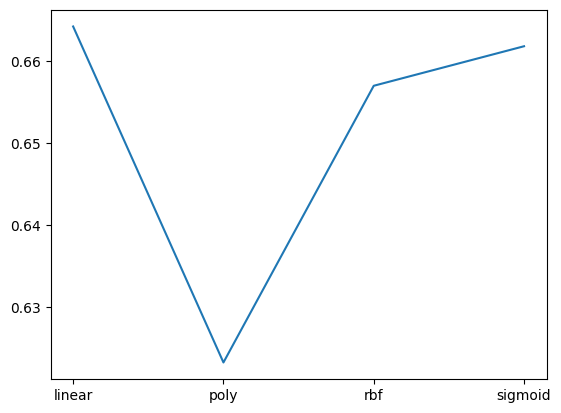

In [ ]:
kern=['linear','poly','rbf','sigmoid'] #Kernels
svc_acc=[]
for k in kern:
  svc=SVC(kernel=k)
  svc.fit(X_train,y_train)
  accs=svc.score(X_test,y_test)
  svc_acc.append(accs)

plt.plot(kern,svc_acc)

In [ ]:
svc_acc #Linear Kernel giving the best performance

[0.6642547033285094, 0.623251326579836, 0.6570188133140377, 0.6618427399903521]